# Import libraires and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('/content/twitter.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df.shape

(31962, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
#dropping the id column as it is not necesary
df.drop('id', axis = 1, inplace=True)
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


# Data Exploration

array([[<Axes: title={'center': 'label'}>]], dtype=object)

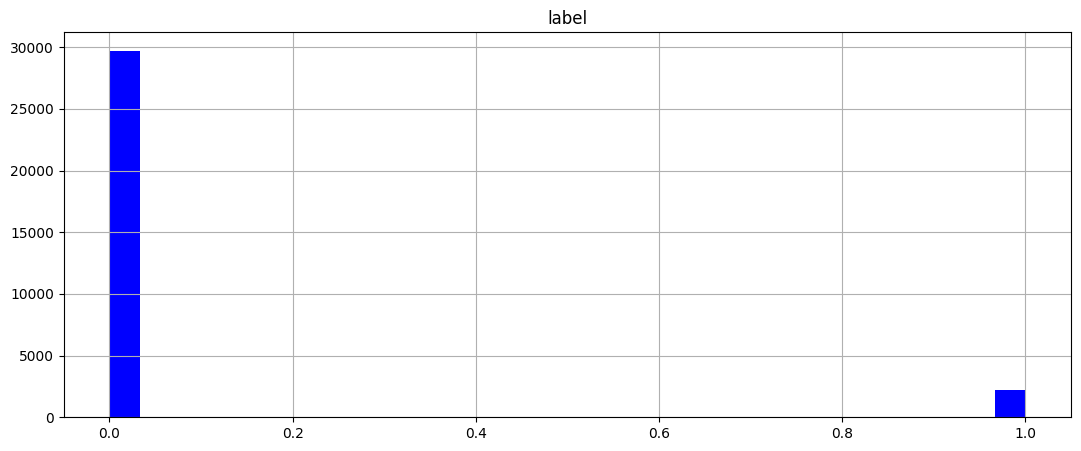

In [6]:
#plot the histogram
df.hist(bins = 30, figsize = (13,5), color = 'b')

In [7]:
#lets get the length of msg
df['length'] = df['tweet'].apply(len)


In [8]:
df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [9]:
df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [10]:
#view the shortest tweet
df[df['length'] == 11]['tweet'].iloc[0]

'i love you '

<Axes: ylabel='Frequency'>

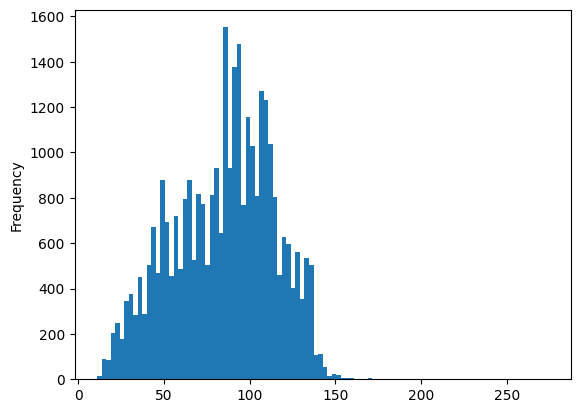

In [11]:
#plot histogram of length column
df['length'].plot(bins=100, kind='hist')

# plot the wordcloud

In [12]:
pos = df[df['label']==0]
pos

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [13]:
neg = df[df['label']==1]
neg

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [14]:
#putting all the tweets together as one sentence
sentence = df['tweet'].tolist()
len(sentence)

31962

In [15]:
#making sentences as one string
sentence_as_one = " ".join(sentence)
sentence_as_one

Output hidden; open in https://colab.research.google.com to view.

In [16]:
!pip install wordcloud

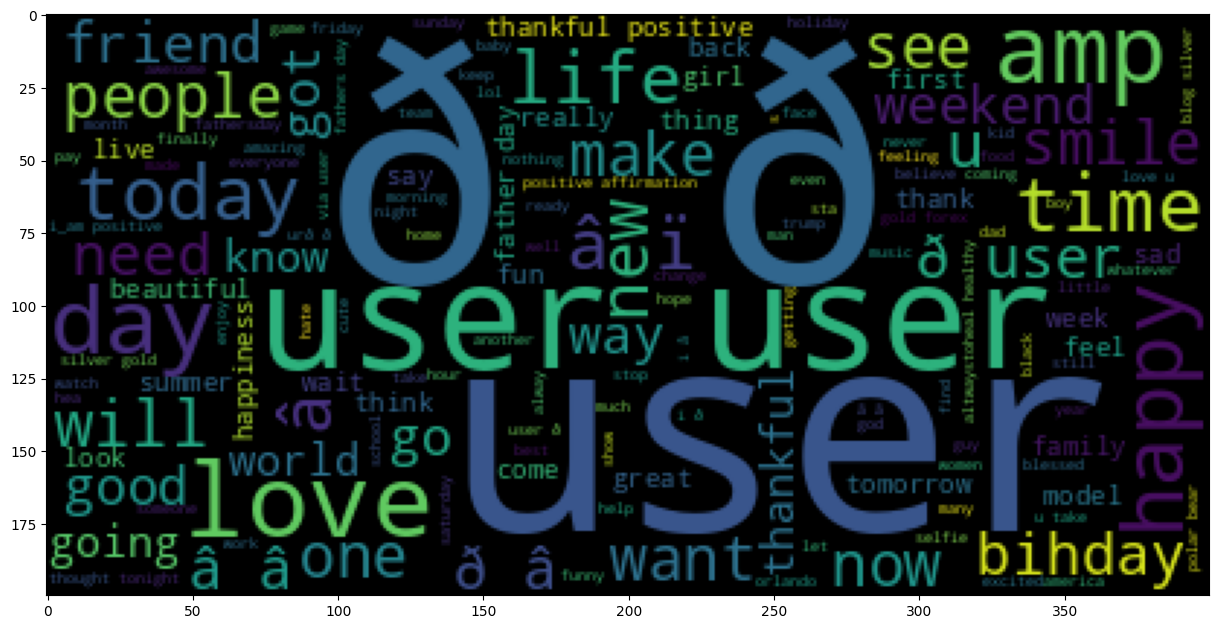

In [17]:
from wordcloud import WordCloud

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentence_as_one))

# Data cleaning - remove punctuation from text

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
test = '@i have $ai'
clear_text = [ char for char in test if char not in string.punctuation ]
clear_text_join = ''.join(clear_text)
clear_text_join


'i have ai'

# Data cleaning - remove stop words

In [20]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
text = "i enjoy reading but it weren't good"
clean_text = [ word for word in text.split() if word.lower() not in stopwords.words('english')]
clean_text


['enjoy', 'reading', 'good']

# Count Vectorization(tokenization)

In [22]:

from sklearn.feature_extraction.text import CountVectorizer
sample = ['this is first paper','this is second paper','this is third paper']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)

In [23]:
print(vectorizer.get_feature_names_out())

['first' 'is' 'paper' 'second' 'third' 'this']


# Create a pipeline to remove punctuation. stopwords and perform vectorization

In [24]:
#craeting a pipeline to remove punctuation and stopwords

def clean_text(message):
  punc_free = [ char for char in message if char not in string.punctuation]
  punc_join = ''.join(punc_free)
  punc_join_clean = [word for word in punc_join.split() if word.lower() not in stopwords.words('english')]
  return punc_join_clean

In [25]:
df_clean = df['tweet'].apply(clean_text)


In [26]:
print(df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=clean_text, dtype = np.uint8)

tweets = vectorizer.fit_transform(df['tweet'])

In [28]:
vectorizer = CountVectorizer(analyzer=clean_text, dtype = np.uint8)


In [31]:
print(vectorizer.get_feature_names_out())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [32]:
print(tweets.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
tweets.shape

(31962, 47386)

In [35]:
X = pd.DataFrame(tweets.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y = df['label']
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
31957,0
31958,0
31959,0
31960,1


# train and evaluate naive bayes model

In [48]:
X.dtypes

,0
0,uint8
1,uint8
2,uint8
3,uint8
4,uint8
...,...
47381,uint8
47382,uint8
47383,uint8
47384,uint8


In [45]:
y.dtype

dtype('int64')

Shapes after splitting:
X_train: (22373, 47386)
y_train: (9589, 47386)


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [58]:
print("Shapes after splitting:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)

Shapes after splitting:
X_train: (22373, 47386)
Y_train: (22373,)


In [59]:
Y_test.shape

(9589,)

In [61]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

<Axes: >

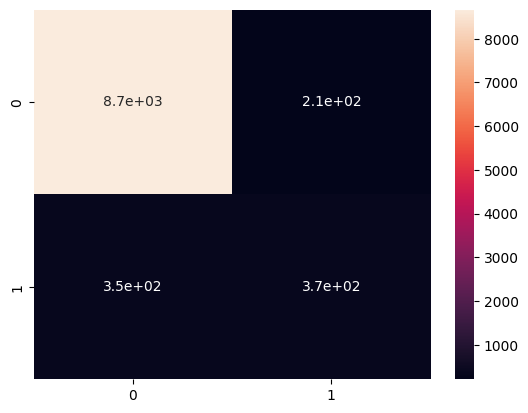

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = (confusion_matrix(Y_test, y_pred))
sns.heatmap(cm, annot=True)

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8873
           1       0.64      0.51      0.57       716

    accuracy                           0.94      9589
   macro avg       0.80      0.75      0.77      9589
weighted avg       0.94      0.94      0.94      9589

